In [5]:
# import torch
python -m pip --version

SyntaxError: invalid syntax (<ipython-input-5-130092de8165>, line 2)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline

In [44]:
c19 = pd.read_csv('../data/time_series_19-covid-Confirmed.csv')
confirmed = c19.iloc[:,4:].sum()
c19a = pd.DataFrame(confirmed).rename(columns={0:'Confirmed'})
c19a.index = pd.to_datetime(c19a.index)
# c19a = c19a.reset_index().rename(columns={'index':'Date'})
# training_data = c19a.values


In [45]:
c19a

,Confirmed
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927
2020-01-28,5578
2020-01-29,6166
2020-01-30,8234
2020-01-31,9927


In [31]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range = (0, 1))
# training_data_scaled = scaler.fit_transform(training_data)

In [50]:
from sklearn.preprocessing import MinMaxScaler
# X = np.array(c19a[['Date']])
# y = np.array(c19a['Confirmed'])
# train_data = X[:12]
# test_data = X[12:]
scaler = MinMaxScaler().fit(c19a[['Confirmed']])
scaled_y = scaler.transform(c19a[['Confirmed']])

# scaled_test_data = scaler.transform(test_data)
c19b = c19a
c19b['Confirmed'] = scaled_y

In [ ]:
#First we’ll scale our train and test data with MinMaxScaler

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler().fit(train_data)
# scaled_train_data = scaler.transform(train_data)
# scaled_test_data = scaler.transform(test_data)

In [146]:
#Before creating LSTM model we should create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator
# test_size = 11
timesteps = 20
n_features= 1
# train, test = c19b[:len(c19b)-test_size], c19b[len(c19b)-test_size:]
train, test = c19b[:-timesteps], c19b[-timesteps:]
generator = TimeseriesGenerator(np.array(train), np.array(train), length=timesteps,batch_size=1)
# len(generator)
# X_train, y_train = generator


In [90]:
len(test)

11

In [153]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(timesteps,1)))
# model.add(Dropout(0.1))
model.add(LSTM(50,activation='relu',return_sequences=True))
# model.add(Dropout(0.1))
model.add(LSTM(50,activation='relu',return_sequences=True))
# model.add(Dropout(0.1))
model.add(LSTM(50,activation='relu',return_sequences=True))
# model.add(Dropout(0.1))
model.add(LSTM(50,activation='relu',return_sequences=False))
# model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mae','acc'])

In [157]:
pip install --user torch

In [154]:
model.fit_generator(generator,epochs=100)

Epoch 1/100
15/15 [==============================] - 3s 174ms/step - loss: 0.1122 - mae: 0.3239 - acc: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 1s 39ms/step - loss: 0.0061 - mae: 0.0611 - acc: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 1s 42ms/step - loss: 0.0022 - mae: 0.0350 - acc: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0029 - mae: 0.0365 - acc: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 1s 57ms/step - loss: 0.0021 - mae: 0.0316 - acc: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 1s 67ms/step - loss: 0.0019 - mae: 0.0358 - acc: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 1s 68ms/step - loss: 0.0026 - mae: 0.0396 - acc: 0.0000e+00
Epoch 8/100
15/15 [==============================] - 1s 68ms/step - loss: 0.0020 - mae: 0.0360 - acc: 0.0000e+00
Epoch 9/100
15/15 [==============================] - 1s 54ms/step - loss: 0.0018 - mae: 0.0342 

In [149]:
test_val = np.array(train[-timesteps:]).reshape((1,timesteps,1))
for i in range(timesteps):
    pred = model.predict(test_val)
    np.append(test_val[0],pred)
    np.delete(test_val[0],0)

In [108]:
test_val

array([[[0.46170804],
        [0.47215607],
        [0.48518435],
        [0.49588654],
        [0.50988723],
        [0.52248454],
        [0.53774497]]])

In [150]:
np.mean(list(map(lambda x,y: abs(x-y), testa.Confirmed[-timesteps:].fillna(0), testa.pred[-timesteps:].fillna(0))))

0.23638118285807952

In [151]:
testa = test
testa['pred'] = pd.Series()
testa['pred'][-timesteps:] = test_val.reshape((1,timesteps))[0]

In [124]:
testa[-7:].index

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16'],
              dtype='datetime64[ns]', freq=None)

In [143]:
model.evaluate(np.array(testa[-7:]).reshape((1,7,1)),np.array(testa['pred'][-7:]).reshape((1,7,1)))

ValueError: cannot reshape array of size 14 into shape (1,7,1)

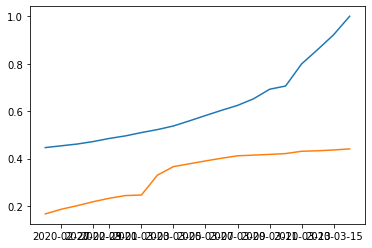

In [152]:
plt.plot(testa)

In [32]:
X_train = []
y_train = []
for i in range(7):
    X_train.append(training_data_scaled[i-7:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [35]:
# regressor = Sequential()

# regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

# regressor.add(Dense(units = 1))

# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mae','acc'])

# regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
